# Homework 3 - Linear and Logistic Regressions
## CSCI 4622 - Fall 2021
***
**Name**: Willem Scott
***

This assignment is due on Canvas by **11.59 PM on Monday, November 1st**.
Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc.
Your solutions to analysis questions should be done in Markdown directly below the associated question.
Remember that you are encouraged to discuss the problems with your classmates and instructors,
but **you must write all code and solutions on your own**, and list any people or sources consulted.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle, gzip
%matplotlib inline

## Problem 1: Linear Regression (55 points)

We have seen that Ridge regression adds a regularization term to the least square using the L2 norm.
The objective is then to minimize:

\begin{align}
\frac{1}{N}\sum_{i=1}^{N} ||y_i-w^T x_i-b||^2 + \alpha||w||^2
\end{align}

where $\mathbf w$ denotes the set of parameters for the linear regression model,
 $\alpha$ is the trade-off regularization parameter, and $N$ the number of samples
The intercept $b$ can also be included in $(x_i)_{i\leq N}$ by appending a constant feature to the data.
You will be using the following data sets:

In [2]:
class CloudData:
    def __init__(self):
        # Data from: https://archive.ics.uci.edu/ml/datasets/Cloud
        data = np.fromfile("data/cloud.data", sep = " ").reshape((1024, 10))
        y = data[:, 6]
        X = np.delete(data, 6, axis = 1)
        
        self.train_x = X[:800]
        self.train_y = y[:800]
        
        self.test_x = X[800:]
        self.test_y = y[800:]
        
class ForestData:
    def __init__(self):
        # Data from: http://archive.ics.uci.edu/ml/datasets/Forest+Fires
        data = pd.read_csv("data/forestfires.csv")
        data = data.sample(frac = 1).reset_index(drop = True).drop(columns = ["month", "day"])
        data["area"] = np.log(data["area"] + 1)
        X = data.drop(columns = "area").values
        y = data["area"].values
        
        self.train_x = X[:400]
        self.train_y = y[:400]
        
        self.test_x = X[400:]
        self.test_y = y[400:]
cloud_data = CloudData()
forest_data = ForestData()

To implement Ridge Regression, We'll use the solver from sklearn module `Ridge`
([read more](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)).
- 1.1 [5 points] Complete the `fit` and `evaluate` methods following the docstring description.

In [11]:
from sklearn import linear_model

class Ridge:
    def __init__(self, alpha):
        """
        Parameters
        ----------
        alpha:  regularization parameter
        """
        self.alpha = alpha # our regularization / penalty term for weights
        self._model = linear_model.Ridge(alpha, fit_intercept=True)  # Using sklearn module Ridge

    def fit(self, X, y):
        """
        Fit the ridge model, train it using the provided data
        Calculate the number of non-zero coefficients in the model weights.
        X: training features (n_samples, n_features)
        y: target values (n_samples)
        
        RETURN :
            num_nonzero_coeff : number of non-zero coefficients in the model weights
        """
        #Workspace 1.1.a
        #BEGIN 
        #TODO: Fit the ridge model and return the number of non-zero coefficients in the model weights.
        
        #Code here
        self._model.fit(X, y)
        
        
        #END
        return self._model.coef_

    def evaluate(self, test_x, test_y):
        """
        Compute Mean square error (MSE) between the predicted values and the actual values  of the test data
        Parameters
        ----------
        test_x: test features
        test_y: test target

        Returns MSE
        -------
        """
        #Workspace 1.1.b
        #BEGIN
        #TODO: predict based on the test features and return the mean_squared_error        

        #Code here
        res = self._model.predict(test_x)

        #END 
        return self.mse(test_y, res)

    @staticmethod
    def mse(y_true, y_hat):
        return np.mean((y_true-y_hat)**2)

In [12]:
# Tests cell
r = Ridge(15)
print(r.fit(cloud_data.train_x, cloud_data.train_y))


[-3.19294965e-04  3.65307232e-03 -2.41868248e-03  3.32305831e-01
 -8.13531061e-03 -6.01887500e-01 -1.72318259e-03  9.95178025e-04
  1.19171413e-03]


1.2 [5 points] For each of the datasets, produce 2 plots using `Ridge` :
  - The number non-zero coefficients versus $\alpha$
  - Mean Squared Error (MSE) on test set versus $\alpha$
 
 Use $\alpha = 1, 50, 100, 200, 1000$

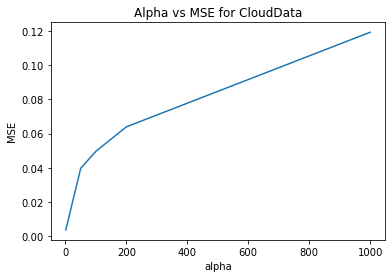

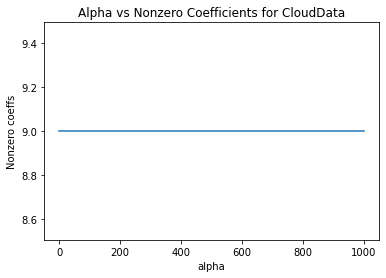

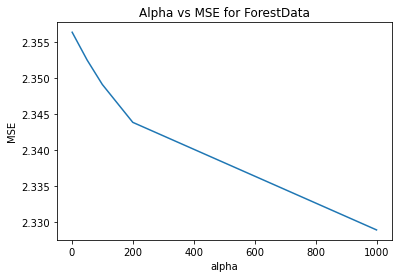

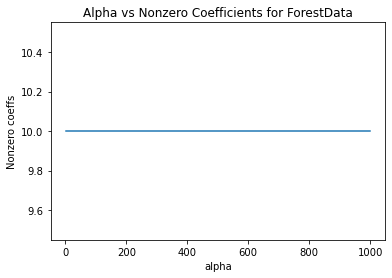

In [13]:
alphas = [1, 50, 100, 200, 1000]
#BEGIN Workspace 1.2

#code here
datasets = [cloud_data, forest_data]
for dataset in datasets:
    aset = [1,50,100,200,1000]
    mses = []
    cfcount = []
    
    for a in aset:
        mod = Ridge(a)
        coeffs = mod.fit(dataset.train_x, dataset.train_y)
        mse = mod.evaluate(dataset.test_x, dataset.test_y)
        mses.append(mse)
        cfcount.append((coeffs != 0).sum())
        
    plt.plot(aset, mses)
    plt.xlabel("alpha")
    plt.ylabel("MSE")
    plt.title(f"Alpha vs MSE for {dataset.__class__.__name__}")
    plt.show()
    plt.plot(aset, cfcount)
    plt.xlabel("alpha")
    plt.ylabel("Nonzero coeffs")
    plt.title(f"Alpha vs Nonzero Coefficients for {dataset.__class__.__name__}")
    plt.show()

#END Workspace 1.2

Now we'll move to Lasso regression. Lasso uses $l_1$ norm in the regularization term and minimizes:
\begin{align}
\frac{1}{2N}\sum_i ||y_i-w^t x_i -b||^2 + \alpha||w||_1
\end{align}

We'll be using the `Lasso`solver from sklearn ([more details](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)).

Complete the Lasso class in the same way as you completed the Ridge class. We'll use the solver from sklearn module `Lasso`
([read more](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)).
- 1.3 [5 points] Complete the `fit` and `evaluate` methods following the docstring description.

In [14]:
class Lasso:
    def __init__(self, alpha):
        """
        Parameters
        ----------
        alpha:  regularization parameter
        """                
        self.alpha = alpha
        self._model = linear_model.Lasso(alpha=alpha, fit_intercept=True)

    def fit(self, X, y):
        """
        Fit the Lasso model, train it using the provided data
        Calculate the number of non-zero coefficients in the model weights.
        X: training features (n_samples, n_features)
        y: target values (n_samples)
        
        RETURN :
            num_nonzero_coeff : number of non-zero coefficients in the model weights
        """
        #Workspace 1.3.a
        #BEGIN 
        #TODO: Fit the Lasso model and return the number of non-zero coefficients in the model weights.
        
        #Code here
        self._model.fit(X, y)
        
        #END
        return self._model.coef_

    def evaluate(self, test_x, test_y):
        """
        Compute Mean square error (MSE) between the predicted values and the actual values  of the test data
        Parameters
        ----------
        test_x: test features
        test_y: test target

        Returns MSE
        -------
        """
        #Workspace 1.3.b
        #BEGIN
        #TODO: predict based on the test features and return the mean_squared_error        
        
        #Code here
        res = self._model.predict(test_x)

        #END 
        return self.mse(test_y, res)

    @staticmethod
    def mse(y_true, y_hat):
        return np.mean((y_true-y_hat)**2)

In [18]:
# Tests cell
r = Lasso(15)
print(r.fit(cloud_data.train_x, cloud_data.train_y))


[-0.          0.          0.          0.          0.00569222 -0.
  0.          0.          0.        ]


1.4 [5 points] For each of the datasets, produce 2 plots using `Lasso` :
  - The number non-zero coefficients versus $\alpha$
  - Mean Squared Error (MSE) on test set versus $\alpha$
 
 Use $\alpha = 0.01, 0.05, 0.1, 0.2, 0.3$

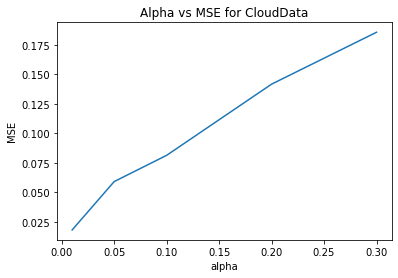

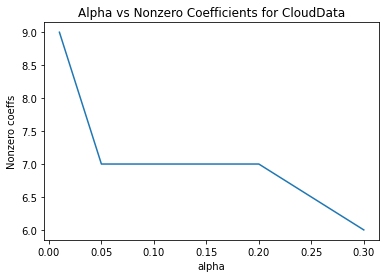

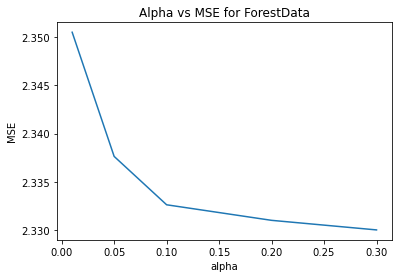

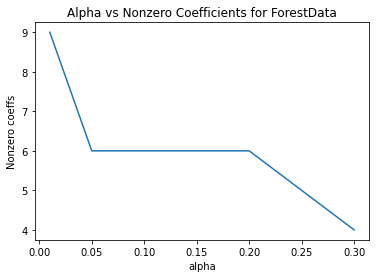

In [16]:
alphas = [0.01, 0.05, 0.1, 0.2, 0.3]
# Workspace 1.4
#BEGIN

#code here
datasets = [cloud_data, forest_data]
for dataset in datasets:
    aset =  [0.01, 0.05, 0.1, 0.2, 0.3]
    mses = []
    cfcount = []
    
    for a in aset:
        mod = Lasso(a)
        coeffs = mod.fit(dataset.train_x, dataset.train_y)
        mse = mod.evaluate(dataset.test_x, dataset.test_y)
        mses.append(mse)
        cfcount.append((coeffs != 0).sum())
        
    plt.plot(aset, mses)
    plt.xlabel("alpha")
    plt.ylabel("MSE")
    plt.title(f"Alpha vs MSE for {dataset.__class__.__name__}")
    plt.show()
    
    plt.plot(aset, cfcount)
    plt.xlabel("alpha")
    plt.ylabel("Nonzero coeffs")
    plt.title(f"Alpha vs Nonzero Coefficients for {dataset.__class__.__name__}")
    plt.show()

#END Workspace 1.2

1.5 [5 points] Compare the two algorithms on each data set: 
- Compare the number of non-zero coordinates of Ridge vs Lasso and their MSE on each dataset.
- Which type of regression is better for each dataset? 

# Workspace 1.5

- Write-up answer here

Elastic Net try to combine both types of regularization to get the best of both worlds by minimizing:

\begin{align}
\frac{1}{2N} \sum_i ||y_i - w^Tx_i -b||^2_2 + \alpha\beta||w||_1 + \frac{\alpha}{2}(1 - \beta)||w||^2_2
\end{align}

where $\beta\in[0,1]$ is the $l_1$ ratio ($\beta=1$ for Lasso and $\beta=0$ for Ridge).

Complete the Elastic class in the same way as you completed the Ridge and Lasso class. We'll use the solver from sklearn module `ElasticNet`
([read more](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)).
- 1.6 [5 points] Complete the `fit` and `evaluate` methods following the docstring description.

In [17]:
class Elastic:
    def __init__(self, alpha, beta=0.5):
        """
        Parameters
        ----------
        alpha:  First regularization parameter
        beta:   Second regularization parameter (default set to 0.5)        
        """                      
        self.alpha = alpha
        self.beta = beta
        self._model = linear_model.ElasticNet(alpha=alpha, l1_ratio=beta, fit_intercept=True)

    def fit(self, X, y):
        """
        Fit the Elastic model, train it using the provided data
        Calculate the number of non-zero coefficients in the model weights.
        X: training features (n_samples, n_features)
        y: target values (n_samples)
        
        RETURN :
            num_nonzero_coeff : number of non-zero coefficients in the model weights
        """
        #Workspace 1.6.a
        #BEGIN 
        #TODO: Fit the Elastic model and return the number of non-zero coefficients in the model weights.
        
        #Code here
        self._model.fit(X, y)
        
        #END
        return self._model.coef_

    def evaluate(self, test_x, test_y):
        """
        Compute Mean square error (MSE) between the predicted values and the actual values  of the test data
        Parameters
        ----------
        test_x: test features
        test_y: test target

        Returns MSE
        -------
        """
        #Workspace 1.6.b
        #BEGIN
        #TODO: predict based on the test features and return the mean_squared_error        

        #Code here
        res = self._model.predict(test_x)

        #END 
        return self.mse(test_y, res)

    @staticmethod
    def mse(y_true, y_hat):
        return np.mean((y_true-y_hat)**2)

In [21]:
# Tests cell
r = Elastic(15)
print(r.fit(cloud_data.train_x, cloud_data.train_y))


[-0.          0.          0.          0.          0.0067543  -0.
  0.          0.00148363  0.        ]


1.7 [5 points] For each of the datasets, produce 2 plots using `Elastic` :
  - The number non-zero coefficients versus $\alpha$
  - Mean Squared Error (MSE) on test set versus $\alpha$
 
Use $\alpha = 0.01, 0.05, 0.1, 0.2, 0.3, 0,5 , 1$  and  $\beta= 0.5$.

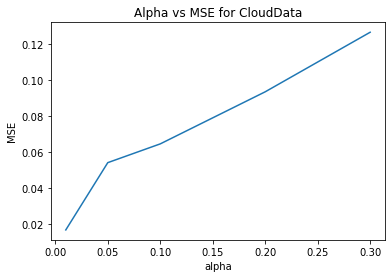

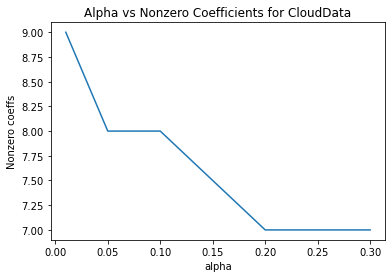

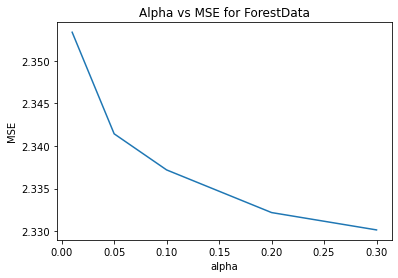

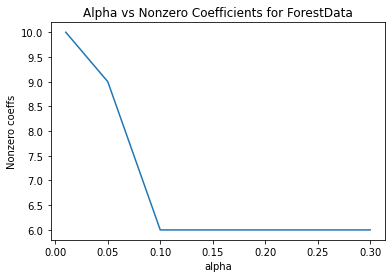

In [22]:
alphas = [0.01, 0.05, 0.1, 0.2, 0.3]
#BEGIN Workspace 1.7

#code here
datasets = [cloud_data, forest_data]
for dataset in datasets:
    aset = [0.01, 0.05, 0.1, 0.2, 0.3]
    mses = []
    cfcount = []
    
    for a in aset:
        mod = Elastic(a)
        coeffs = mod.fit(dataset.train_x, dataset.train_y)
        mse = mod.evaluate(dataset.test_x, dataset.test_y)
        mses.append(mse)
        cfcount.append((coeffs != 0).sum())
        
    plt.plot(aset, mses)
    plt.xlabel("alpha")
    plt.ylabel("MSE")
    plt.title(f"Alpha vs MSE for {dataset.__class__.__name__}")
    plt.show()
    
    plt.plot(aset, cfcount)
    plt.xlabel("alpha")
    plt.ylabel("Nonzero coeffs")
    plt.title(f"Alpha vs Nonzero Coefficients for {dataset.__class__.__name__}")
    plt.show()

#END Workspace 1.2

1.8 [5 points] What are the pros and cons of each of three types of regressions we have implemented?

# Workspace 1.8
- Write-up answer here

## Problem 2: Logistic Regression for Binary Classification (45 points)
***
The second part of this assignment will be dealing with Logistic Regression. While the name "regression" suggests otherwise, Logistic Regression is actaully used for classification.
It's called regression because the model learns the continuous likelihood of multiple/a certain outcome.

Our dataset is a subset of the MNIST dataset, which is a higher resolution of the sklearn digits data seen in HW1. 

In this problem you'll implement a Logistic Regression classifier to take drawings of either an eight
or a nine and output the corresponding label.

In [23]:
class BinaryMNIST:
    """
    Class to store MNIST data for images of 9 and 8 only
    """
    def __init__(self, location='./data/mnist.pklz'):
        # You shouldn't have to modify this class, but you can if you'd like
        # Load the dataset
        with gzip.open(location, 'rb') as f:
            self.train_x, self.train_y, self.test_x, self.test_y = pickle.load(f)

        train_indices = np.where(self.train_y > 7)
        self.train_x, self.train_y = self.train_x[train_indices], self.train_y[train_indices]
        self.train_y = self.train_y - 8

        test_indices = np.where(self.test_y > 7)
        self.test_x, self.test_y = self.test_x[test_indices], self.test_y[test_indices]
        self.test_y = self.test_y - 8

binary_mnist = BinaryMNIST()

Logistic Regression is about minimizing the negative log likelihood objective is defined as:
\begin{align}
\textrm{NLL}(w) = -\frac{1}{N}\sum_{i=1}^N \left[y_i \log \sigma(w^T{x_i}) + (1-y_i)\log(1 - \sigma(w^Tx_i))\right]
\end{align}
where $\sigma$ is the *sigmoid function* seen in class.

Note that we're excluding the intercept since we'll be adding a constant column to the $(x_i)_i$. 
We will call it the zero-th column and the intercept will be $w_0$.

The gradient of $NLL$ w.r.t $w$,  $\frac{\partial \textrm{NLL}}{\partial w}$

\begin{align}
\frac{\partial \textrm{NLL}}{\partial w} = \frac{1}{N} \sum_i \left[\sigma(w^Tx_i)-y_i)\right]x_i
\end{align}

- 2.1 [5 points] Finish the `calculate_score` function to return the output of applying
the dot product of the weights with the input parameter

- 2.2 [5 points] Finish the `sigmoid` function to return the output of applying the sigmoid function to the calculated score

- 2.3 [5 points] Finish the `compute_gradient` function to return the derivative of the cost w.r.t. the weights

- 2.4 [5 points] Finish the `batch_update` function so that it performs batch gradient descent using the provided batch data and updates the weight vector correspondingly

- 2.5 [5 points] Finish the `fit` function so that it iterates over the training epochs and returns the Recall score (in-built sklearn metrics) on the validation data at the end of each epoch.

In [36]:
from sklearn.metrics import recall_score

class LogisticRegression:

    def __init__(self, eta = 0.1):
        """
        Create a Logistic regression classifier
        :param eta: Learning rate (the default is a constant value)
        """
        self.w = None      # our array of weights
        self.eta = eta # our learning rate
        self.X = None   # features matrix
        self.y = None   # labels / outcomes array

    def calculate_score(self, x):
        """
        :param x: This can be a single training example or it could be n training examples
        :return score: Calculate the score that you will plug into the logistic function
        """
        #Workspace 2.1
        # TODO: Compute the score to be fed to the sigmoid function
        #BEGIN
        #Code here
#         w.X + b
        
        return -self.w * x
        
        #END

    def sigmoid(self, score, threshold=25.0):
        """
        :param score: Either a real valued number or a vector to convert into a number between 0 and 1
        :param threshold : Capping activations at 25 prevent overflow of np.exp() function.
        :return sigmoid: Calculate the output of applying the sigmoid function to the score. This could be a single
        value or a vector depending on the input.
        """
        #BEGIN Workspace 2.2
        # TODO: Complete this function to return the output of applying the sigmoid function to the score
        #Code here
        return (1/(1 + np.exp(score))).round()
    
    def compute_gradient(self, x, h, y):
        """
        :param x: Feature vector
        :param h: the sigmoid of the scores computed from x
        :param y: real class label
        :return gradient: Return the derivative of the cost w.r.t to the weights
        """

        #Workspace 2.3
        # TODO: Finish this function to compute the gradient
        #BEGIN
        #Code here
        
        return np.dot(x.T, (h - y))/x.shape[0]
        
    def batch_update(self, batch_x, batch_y):
        """
        Single self.w update using the batch. We should average the gradient over the batch size
        :param batch_x: NumPy array of features (size : size of batch X features + 1 for the intercept)
        :param batch_y: Numpy array of class labels (size : size of batch )
        :return: nothing
        """

        #Workspace 2.4
        #BEGIN
        #Code here
        self.w = self.w - self.eta * self.compute_gradient(batch_x, self.sigmoid(batch_x), batch_y)
        
        #END        
        
    def fit(self, X, y, epochs=1, batch_size=1, validation_X=None, validation_y=None):
        """
        :param X: training features
        :param y: training labels
        :param epochs: number of epochs
        :param batch_size: size of batch for gradient update
        :param validation_X: validation rows, should default to training data if not provided
        :param validation_y: validation labels
        :return: metric value at the end of each epoch on validation data
        """        
        if validation_X is None:
            validation_X, validation_y = X, y
        metrics = []
        
        # Workspace  2.5
        # TODO: Process x to append the zero-th constant column
        # TODO: Compute average recall on the validation data at the end of each epoch
        # HINT: Don't forget to initialize your weights!
        
        #BEGIN
        #Code here
        self.w = np.zeros(X.shape)
        
        for epoch in range(epochs):
            for i in range((X.shape[0]-1)//batch_size + 1):
                # Defining batches. SGD.
                start_i = i*batch_size
                end_i = start_i + batch_size

                # Updating the parameters.
                self.batch_update(X[start_i:end_i], y[start_i:end_i])
        
        # Calculating loss and appending it in the list.
        l = loss(y, self.sigmoid(np.dot(X, self.w)))
        losses.append(l)
        
        #END
        
        return np.array(metrics)
    
    
    def predict(self, test_x):
        """
        :param test_x: n rows to predict on
        :return: n predicted labels
        """
        X = np.concatenate([np.ones((test_x.shape[0],1)), test_x], axis=1)
        return np.round(self.sigmoid(self.calculate_score(X))).astype(int)


    def optimize(self, batch_size):
        """
        Shuffle the training data (use permutation) and send batches to batch_update to update $self.w$
        Parameters
        :batch_size: size of batches to use for stochastic gradient
        :return: nothing
        """

        indices = np.random.permutation(len(self.X))
        for i in range(0, self.X.shape[0], batch_size):
            batch_x = self.X[indices[i:i+batch_size]]
            batch_y = self.y[indices[i:i+batch_size]]
            self.batch_update(batch_x, batch_y)

In [37]:
# Tests cell
r = LogisticRegression(15)
print(r.fit(cloud_data.train_x, cloud_data.train_y))


ValueError: operands could not be broadcast together with shapes (800,9) (9,9) 

After completing the class above, loop over the training data and perform batch training with `batch_size = 1` for `10 epochs`, and five different values of `eta`, i.e, [$.0001, .01, .1, .5, 1$]. Train your model and do the following:

2.6 [5 points] Create a new classifier object and Using the `fit` method, plot the recall trend for the different values of eta on the training data

In [ ]:
etas = [.0001,.001,.01, 1, 5]
np.random.seed(42)
for eta in etas:
#Workspace 2.6
#BEGIN
        #Code here
        raise NotImplementedError()

#END

- 2.7 [5 points] Create a new classifier object and Using the `fit` method, plot the values of recall versus eta

In [ ]:
etas = [.0001,.001,.01, 1, 5]
#Workspace 2.7
#BEGIN
        #Code here
        raise NotImplementedError()

#END

This time we want to analyze the effect of varying the batch size. We fix `eta = 0.1` and `epochs = 10` and we want to examine the recall on the test set at the end of the training for `batch_size` in [$1, 2, 4, 8, 12, 16$].

- 2.8 [5 points] Produce a plot of the recall at the end of the training as a function of the batch size

In [ ]:
batch_sizes= [1, 2, 4, 8, 12, 16]
recalls = []
#Workspace 2.8
#BEGIN
        #Code here
        raise NotImplementedError()

#END

2.9 [5 points] How does the learning rate (`eta`) and the number of epochs affect the performance of the classifier.

# Workspace 2.9
- Write-up answer here

2.BONUS [10 Points] Since we're done with the binary regression, we will try to add Ridge regularization:
\begin{align}
\textrm{NLL}(w) = -\frac{1}{N}\sum_{i=1}^N \left[y_i \log \sigma(w^T{x_i}) + (1-y_i)\log(1 - \sigma(w^Tx_i))\right] + \alpha {||w||^2}
\end{align}

We will need to add an `alpha` parameter in our `LogisticRegression` class (with a default value) 

First, write the gradient formula in the cell below. Then, edit your `compute_gradient` to account for the regularization term. Ensure the rest of your functions still run correctly!

<2.BONUS Write your modified gradient formula here>